# Sklearn

# Визуализация данных

In [1]:
from sklearn import datasets

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загрузка выборки

In [3]:
digits  =  datasets.load_digits()

In [4]:
print digits.DESCR

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [5]:
print 'target:', digits.target[0]
print 'features: \n', digits.data[0] 
print 'number of features:', len(digits.data[0])

target: 0
features: 
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
number of features: 64


## Визуализация объектов выборки

TypeError: Invalid dimensions for image data

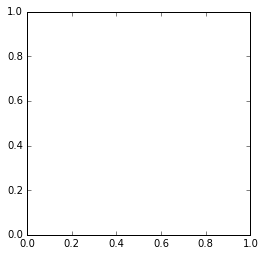

In [6]:
#не будет работать: Invalid dimensions for image data
pylab.imshow(digits.data[0])

In [7]:
digits.data[0].shape

(64L,)

In [8]:
print digits.data[0].reshape(8,8)

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [9]:
digits.data[0].reshape(8,8).shape

(8L, 8L)

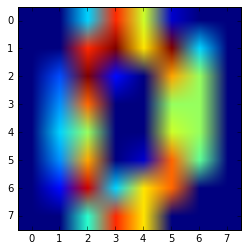

In [10]:
pylab.imshow(digits.data[0].reshape(8,8))

In [11]:
print digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']


In [12]:
print digits.images[0]

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


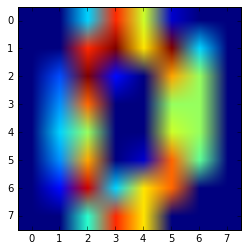

In [13]:
pylab.imshow(digits.images[0])

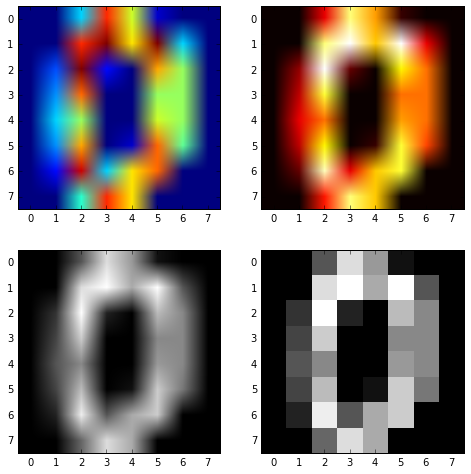

In [14]:
pyplot.figure(figsize(8, 8))

pyplot.subplot(2, 2, 1)
pylab.imshow(digits.images[0])

pyplot.subplot(2, 2, 2)
pylab.imshow(digits.images[0], cmap = 'hot')

pyplot.subplot(2, 2, 3)
pylab.imshow(digits.images[0], cmap = 'gray')

pyplot.subplot(2, 2, 4)
pylab.imshow(digits.images[0], cmap = 'gray', interpolation = 'nearest')

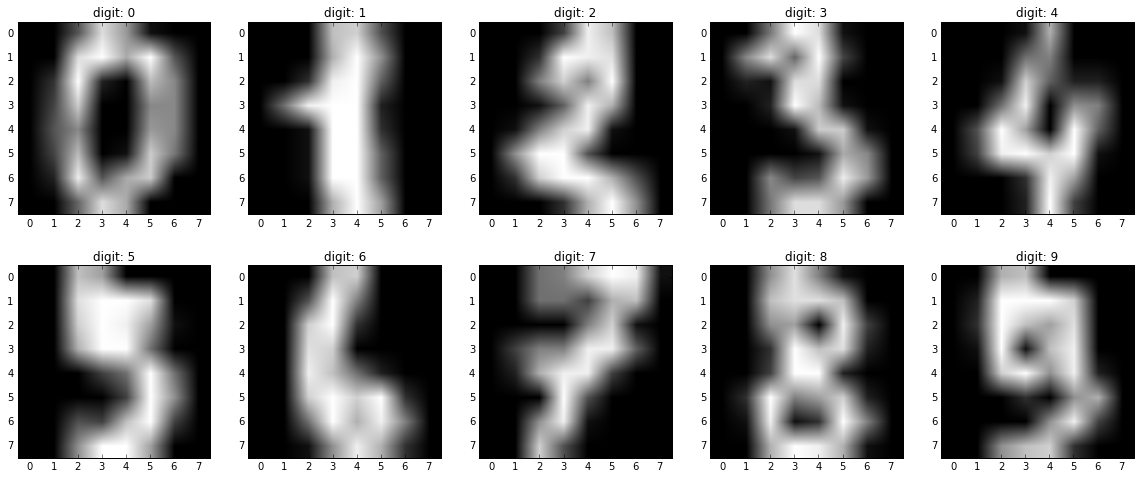

In [15]:
pyplot.figure(figsize(20, 8))

for plot_number, plot in enumerate(digits.images[:10]):
    pyplot.subplot(2, 5, plot_number + 1)
    pylab.imshow(plot, cmap = 'gray')
    pylab.title('digit: ' + str(digits.target[plot_number]))

## Уменьшение размерности

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from collections import  Counter

In [17]:
data = digits.data[:1000]
labels = digits.target[:1000]

In [18]:
print Counter(labels)

Counter({3: 104, 1: 102, 6: 101, 2: 100, 5: 100, 0: 99, 7: 99, 9: 99, 4: 98, 8: 98})


<Container object of 10 artists>

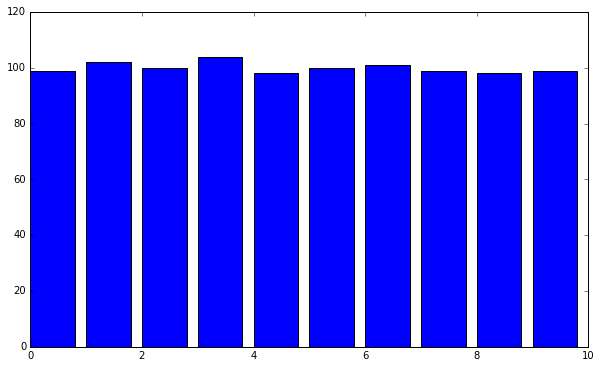

In [19]:
pylab.figure(figsize = (10, 6))
pylab.bar(Counter(labels).keys(), Counter(labels).values())

In [20]:
classifier = KNeighborsClassifier()

In [21]:
classifier.fit(data, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
print classification_report(classifier.predict(data), labels)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        99
          1       1.00      0.97      0.99       105
          2       1.00      1.00      1.00       100
          3       1.00      0.98      0.99       106
          4       1.00      1.00      1.00        98
          5       0.99      1.00      0.99        99
          6       1.00      1.00      1.00       101
          7       0.99      0.99      0.99        99
          8       0.97      0.99      0.98        96
          9       0.96      0.98      0.97        97

avg / total       0.99      0.99      0.99      1000



### Random projection

In [24]:
from sklearn import random_projection

In [25]:
projection = random_projection.SparseRandomProjection(n_components = 2, random_state = 0)
data_2d_rp = projection.fit_transform(data)

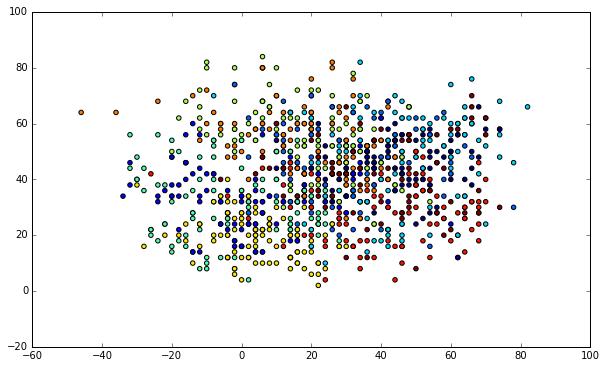

In [26]:
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_rp[:, 0], data_2d_rp[:, 1], c = labels)

In [27]:
classifier.fit(data_2d_rp, labels)
print classification_report(classifier.predict(data_2d_rp), labels)

             precision    recall  f1-score   support

          0       0.67      0.38      0.48       175
          1       0.64      0.48      0.55       136
          2       0.34      0.38      0.36        89
          3       0.38      0.43      0.40        91
          4       0.57      0.57      0.57        99
          5       0.49      0.51      0.50        96
          6       0.60      0.66      0.63        92
          7       0.39      0.48      0.43        82
          8       0.44      0.55      0.49        78
          9       0.29      0.47      0.36        62

avg / total       0.51      0.48      0.49      1000



### PCA

In [28]:
from sklearn.decomposition import RandomizedPCA

In [29]:
pca = RandomizedPCA(n_components = 2, random_state = 0)
data_2d_pca = pca.fit_transform(data)

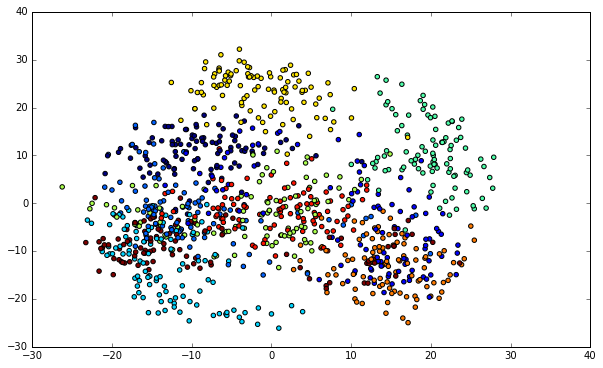

In [30]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c = labels)

In [31]:
classifier.fit(data_2d_pca, labels)
print classification_report(classifier.predict(data_2d_pca), labels)

             precision    recall  f1-score   support

          0       0.83      0.73      0.77       113
          1       0.56      0.54      0.55       105
          2       0.59      0.57      0.58       104
          3       0.77      0.79      0.78       101
          4       0.95      0.93      0.94       100
          5       0.56      0.54      0.55       104
          6       0.92      0.93      0.93       100
          7       0.76      0.71      0.74       105
          8       0.62      0.66      0.64        92
          9       0.52      0.67      0.58        76

avg / total       0.71      0.71      0.71      1000



### MDS

In [32]:
from sklearn import manifold

In [33]:
mds = manifold.MDS(n_components = 2, n_init = 1, max_iter = 100)
data_2d_mds = mds.fit_transform(data)

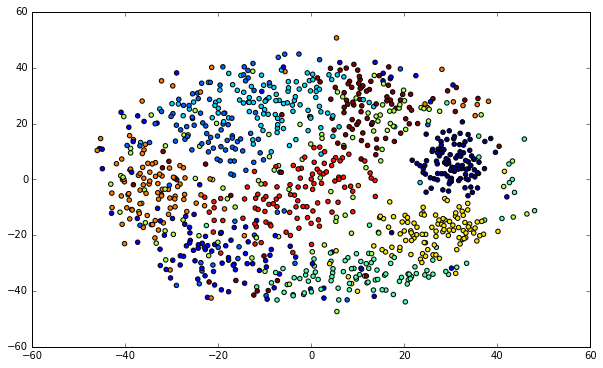

In [34]:
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], c = labels)

In [35]:
classifier.fit(data_2d_mds, labels)
print classification_report(classifier.predict(data_2d_mds), labels)

             precision    recall  f1-score   support

          0       0.99      0.93      0.96       105
          1       0.67      0.57      0.61       120
          2       0.69      0.68      0.68       102
          3       0.80      0.80      0.80       104
          4       0.84      0.75      0.79       109
          5       0.36      0.58      0.44        62
          6       0.93      0.92      0.93       102
          7       0.76      0.71      0.73       106
          8       0.88      0.80      0.84       107
          9       0.64      0.76      0.69        83

avg / total       0.77      0.75      0.76      1000



### t- SNE

In [36]:
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
data_2d_tsne = tsne.fit_transform(data)

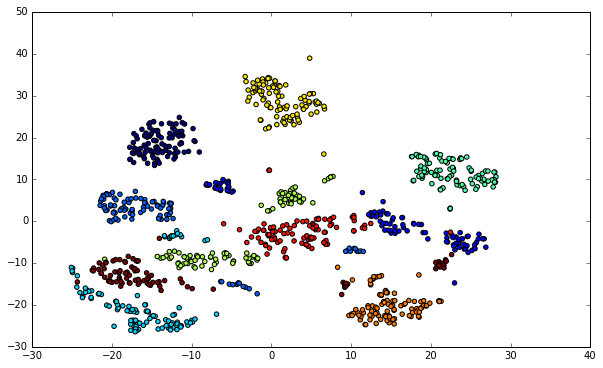

In [37]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = labels)

In [38]:
classifier.fit(data_2d_tsne, labels)
print classification_report(classifier.predict(data_2d_tsne), labels)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        99
          1       0.99      0.99      0.99       102
          2       1.00      0.99      1.00       101
          3       1.00      0.98      0.99       106
          4       1.00      1.00      1.00        98
          5       0.99      0.98      0.99       101
          6       0.99      1.00      1.00       100
          7       0.98      1.00      0.99        97
          8       0.98      0.99      0.98        97
          9       0.96      0.96      0.96        99

avg / total       0.99      0.99      0.99      1000

